# Phase 1 Final Project 


* Student Names: Adina Steinman, Chinh Ho, Andrew Banner 
* Instructor Name: Yish Lim

## Introduction 

Throughout Phase 1, we have learned various ways to explore datasets. This notebook will focus on the data cleaning portion of our Project; learning how to use the TMDB API, navigating and exploring data from the API, selecting relevant data for our analyses, and constructing DataFrames. 


## Part I: Getting Started

Our first step will involve importing all the necessary packages for our analyses. We will import "requests" in order to use the requests.get() method to investigate the API, import "json" to view our data in json format, import "pandas" to transfer our data into DataFrames, import "time" to include a delay in our API call when pulling large sets of data, and lastly but most importantly, import "tmdbsimple", the TMDB specific wrapper that will assist in exploring and analyzing this specfiic API.

We will then create a function that allows us to open the API call in json format, as well as retrieve the API key we have created, without displaying the precise API key that we used (as we don't want to give our password away!).



In [25]:
# import the necessary packages for the data cleaning process
import requests
import json
import pandas as pd
import time 
import tmdbsimple as tmdb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create a function "get_keys" to retrieve API key from file on local computer

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [3]:
# retrieve API key

keys = get_keys("/Users/adinasteinman/.secret/movies_api.json")
api_key = keys['api_key']

In [4]:
# set API key equal to TMDB key to be used in tmdbsimple wrapper 

tmdb.API_KEY = api_key

## Part II: Data Exploration

Our next step will be to get to know the data from TMDB Simple. We will investigate this data using different techniques, such as the "movies", "search" and "discover" calls. We will also look at how to call the API using the requests.get method, and will compare the two exploration methods and determine which we would prefer to use for the remainder of our analysis. The goal of this section is to find different ways to extract different data and to use this exercise to assist with determining which data we would like to analyze.

In [5]:
# explore the data available when use the "tmdb.Movies call"

tmdb.Movies(5).info()

{'adult': False,
 'backdrop_path': '/5J9lhMZHVQRfH8BV4hyehwptzKp.jpg',
 'belongs_to_collection': None,
 'budget': 4000000,
 'genres': [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}],
 'homepage': '',
 'id': 5,
 'imdb_id': 'tt0113101',
 'original_language': 'en',
 'original_title': 'Four Rooms',
 'overview': "It's Ted the Bellhop's first night on the job...and the hotel's very unusual guests are about to place him in some outrageous predicaments. It seems that this evening's room service is serving up one unbelievable happening after another.",
 'popularity': 14.543,
 'poster_path': '/uZSmxBLIuZ8gpadjAWNdA5aQDAc.jpg',
 'production_companies': [{'id': 14,
   'logo_path': '/m6AHu84oZQxvq7n1rsvMNJIAsMu.png',
   'name': 'Miramax',
   'origin_country': 'US'},
  {'id': 59,
   'logo_path': '/yH7OMeSxhfP0AVM6iT0rsF3F4ZC.png',
   'name': 'A Band Apart',
   'origin_country': 'US'}],
 'production_countries': [{'iso_3166_1': 'US',
   'name': 'United States of America'}],
 'release_date'

In [6]:
# input the TMDB "search" function

search = tmdb.Search()

In [7]:
# explore the TMDB search function by searching for all "Sony Pictures" films

response1 = search.company(query='Sony Pictures')
response1

{'page': 1,
 'results': [{'id': 82346,
   'logo_path': '/jqgK6CSkPrEsIv6Nk390JaBcXYF.png',
   'name': 'Sony Pictures',
   'origin_country': 'JP'},
  {'id': 34,
   'logo_path': '/GagSvqWlyPdkFHMfQ3pNq6ix9P.png',
   'name': 'Sony Pictures',
   'origin_country': 'US'},
  {'id': 134941,
   'logo_path': None,
   'name': 'Sony Pictures',
   'origin_country': ''},
  {'id': 11073,
   'logo_path': '/wHs44fktdoj6c378ZbSWfzKsM2Z.png',
   'name': 'Sony Pictures Television',
   'origin_country': 'US'},
  {'id': 30692,
   'logo_path': '/4ZSWXR7TfxwJbXGcnOAf617AC3h.png',
   'name': 'Sony Pictures Imageworks',
   'origin_country': 'CA'},
  {'id': 8285,
   'logo_path': None,
   'name': 'Sony Pictures Studio',
   'origin_country': ''},
  {'id': 58,
   'logo_path': '/voYCwlBHJQANtjvm5MNIkCF1dDH.png',
   'name': 'Sony Pictures Classics',
   'origin_country': 'US'},
  {'id': 2251,
   'logo_path': '/6l16UFSkZ1oPpyBYaILgffFZlTc.png',
   'name': 'Sony Pictures Animation',
   'origin_country': 'US'},
  {'id': 

In [8]:
# use for loop to explore 'origin country' of the results

for movie in response1['results']:
    print(movie['origin_country'])

JP
US

US
CA

US
US

US

US
US
US
FR

KR
BR
IN
US


In [9]:
# input TMDB discover method

discover = tmdb.Discover()

In [10]:
# test the discover method to find titles for films in the year 2016

response2 = discover.movie(year=2016)
response2
for value in response2['results']:
    print(value['title'])

The Last: Naruto the Movie
Terrifier
Your Name.
Harry Potter and the Prisoner of Azkaban
A Silent Voice
Dragon Ball Z: Resurrection 'F'
Harry Potter and the Half-Blood Prince
ABCs of Death 2 1/2
Deadpool
Yu-Gi-Oh!: The Dark Side of Dimensions
Hacksaw Ridge
Scream at the Devil
Doctor Strange
The Maze Runner
Harry Potter and the Deathly Hallows: Part 2
The Purge: Election Year
Harry Potter and the Deathly Hallows: Part 1
The Hobbit: The Battle of the Five Armies
Sing
Containment


In [11]:
# Find the length of the results 
# This should tell us how many results we are able to explore in each API call 
len(response2['results'])

20

In [12]:
#Explore a specific genre. Look at comedy for example, which has the genre id code 35

comedy = discover.movie(with_genres=35)
comedy['results'][0:2]

[{'popularity': 872.93,
  'vote_count': 43,
  'video': False,
  'poster_path': '/5aL71e0XBgHZ6zdWcWeuEhwD2Gw.jpg',
  'id': 721656,
  'adult': False,
  'backdrop_path': '/5gTQmnGYKxDfmUWJ9GUWqrszRxN.jpg',
  'original_language': 'en',
  'original_title': 'Happy Halloween Scooby-Doo!',
  'genre_ids': [16, 35, 80, 9648, 10751],
  'title': 'Happy Halloween Scooby-Doo!',
  'vote_average': 7.8,
  'overview': 'Scooby-Doo and the gang team up with their pals, Bill Nye The Science Guy and Elvira Mistress of the Dark, to solve this mystery of gigantic proportions and save Crystal Cove!',
  'release_date': '2020-10-06'},
 {'popularity': 772.926,
  'vote_count': 91,
  'video': False,
  'poster_path': '/xqvX5A24dbIWaeYsMTxxKX5qOfz.jpg',
  'id': 660982,
  'adult': False,
  'backdrop_path': '/75ooojtgiKYm5LcCczbCexioZze.jpg',
  'original_language': 'en',
  'original_title': "American Pie Presents: Girls' Rules",
  'genre_ids': [35],
  'title': 'American Pie Presents: Girls Rules',
  'vote_average': 6.

In [13]:
# Explore how to use the TMDb API using the requests.get method 
response3 = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&sort_by=popularity.desc')
popularity = response3.json()
top_popular = popularity['results']
top_popular[0:2]

[{'popularity': 3130.643,
  'vote_count': 143,
  'video': False,
  'poster_path': '/7D430eqZj8y3oVkLFfsWXGRcpEG.jpg',
  'id': 528085,
  'adult': False,
  'backdrop_path': '/5UkzNSOK561c2QRy2Zr4AkADzLT.jpg',
  'original_language': 'en',
  'original_title': '2067',
  'genre_ids': [18, 878, 53],
  'title': '2067',
  'vote_average': 5.8,
  'overview': 'A lowly utility worker is called to the future by a mysterious radio signal, he must leave his dying wife to embark on a journey that will force him to face his deepest fears in an attempt to change the fabric of reality and save humankind from its greatest environmental crisis yet.',
  'release_date': '2020-10-01'},
 {'popularity': 1724.443,
  'vote_count': 114,
  'video': False,
  'poster_path': '/elZ6JCzSEvFOq4gNjNeZsnRFsvj.jpg',
  'id': 741067,
  'adult': False,
  'backdrop_path': '/aO5ILS7qnqtFIprbJ40zla0jhpu.jpg',
  'original_language': 'en',
  'original_title': 'Welcome to Sudden Death',
  'genre_ids': [28, 12, 18, 53],
  'title': 'We

## Part III: Accessing the Data

We will now access the data that we will use for the remainder of our project. During our exploration phase, we learned that we can pull one page at a time, which will provide us with 20 results. We want, however, to be able to access **10,000 rows** of data across 500 pages. Our first step in this phase will be to create a loop that will append all 500 pages of results to a list. Do note that this API call is pulling the data based on popularity, in descending order.

In [55]:
# Pull the data of all 10,000 rows of data across all 500 pages. Append this to a lit called "finallist" which will contain the data of movies, sorted by the most popular first.

finallist=[]
n=0
while n<500:
    n+=1
    url='http://api.themoviedb.org/3/discover/movie?&sort_by=popularity.desc&offset=20&page={}&api_key='.format(n)
    req=requests.get(url+api_key).json()
    results=req['results']
    finallist.extend(results)
    time.sleep(2)

In [56]:
# Find the length of this new list to confirm our 10,000 rows were retrieved 
len(finallist)

10000

We see here that this worked! The length of our final list is 10,000. We will now turn this into a DataFrame and explore what variables are available to us.

In [57]:
# Put this new data into a dataframe and explore the information available
pop = pd.DataFrame(finallist)
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
popularity           10000 non-null float64
vote_count           10000 non-null int64
video                10000 non-null bool
poster_path          9853 non-null object
id                   10000 non-null int64
adult                10000 non-null bool
backdrop_path        9416 non-null object
original_language    10000 non-null object
original_title       10000 non-null object
genre_ids            10000 non-null object
title                10000 non-null object
vote_average         10000 non-null float64
overview             10000 non-null object
release_date         9991 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 957.2+ KB


In [58]:
pop.head(2)

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,2931.926,151,False,/7D430eqZj8y3oVkLFfsWXGRcpEG.jpg,528085,False,/5UkzNSOK561c2QRy2Zr4AkADzLT.jpg,en,2067,"[18, 878, 53]",2067,5.8,A lowly utility worker is called to the future...,2020-10-01
1,1615.119,117,False,/elZ6JCzSEvFOq4gNjNeZsnRFsvj.jpg,741067,False,/aO5ILS7qnqtFIprbJ40zla0jhpu.jpg,en,Welcome to Sudden Death,"[28, 12, 18, 53]",Welcome to Sudden Death,6.6,Jesse Freeman is a former special forces offic...,2020-09-29


While this is a comprehensive amount of variables, we are still missing an important feature: movie revenue. We will now use another for loop in order to create a dictionary of key-value pairs, where the key is the movie ID and the value is that movie's revenue.

In [59]:
# note that the "revenue" column is not in the above dataframe. 
# Retrieve the revenue data for the items in this list 
# Note that the 'id's 627494 and 726682 are excluded. This is because these URLs contain corrupt data 
# The corrupt data caused an error in our for loop; when excluded, we are able to retrieve revenue 
# data for 9,998 films

pop_dict = {}

for item in finallist:
    if item['id'] != 627494 and item['id'] != 726682:
        tmp = tmdb.Movies(item['id']).info()
        pop_dict[tmp['id']] = tmp['revenue']
    

In [60]:
print(pop_dict)

{528085: 0, 741067: 0, 497582: 0, 724989: 0, 337401: 57000000, 694919: 0, 721656: 0, 635302: 44143781, 660982: 0, 718444: 139757, 697064: 0, 734309: 0, 539885: 152812, 581392: 35878266, 592350: 29900850, 475430: 0, 438396: 0, 590223: 0, 606234: 0, 677638: 0, 721452: 0, 605116: 0, 474350: 473093228, 621870: 0, 594328: 0, 520763: 0, 746957: 0, 726739: 0, 722603: 0, 547016: 0, 495764: 201858461, 703134: 0, 38700: 419074646, 613504: 0, 475557: 1074251311, 446893: 1946164, 425001: 8982106, 617505: 0, 532067: 0, 531499: 0, 601165: 0, 385103: 9430580, 611395: 0, 632618: 0, 603119: 0, 493065: 0, 454626: 306766470, 516486: 0, 601844: 0, 680295: 0, 624963: 0, 459151: 0, 508439: 103181419, 338762: 30234182, 715658: 0, 330457: 1450026933, 664767: 0, 572154: 0, 713825: 0, 489326: 106270, 667141: 0, 458576: 0, 738215: 0, 611605: 0, 640882: 0, 744676: 0, 545609: 0, 735110: 0, 354912: 800526015, 440249: 0, 604578: 0, 384018: 760098996, 709621: 0, 631132: 0, 704630: 0, 733491: 0, 716258: 0, 514207: 321

In [61]:
# Find the length of the dictionary that contains the key:value pairs for movie id and revenue

len(pop_dict)

9998

Great! We now have a dictionary that includes 9,998 rows of data for revenue. We will now turn this information into a DataFrame as well.

In [62]:
# Convert this dictionary to a DataFrame and explore the first 10 rows 
pop_revenue = pd.DataFrame.from_dict(pop_dict, orient='index', columns=['revenue'])
pop_revenue.head(10)

,revenue
528085,0
741067,0
497582,0
724989,0
337401,57000000
694919,0
721656,0
635302,44143781
660982,0
718444,139757


In [63]:
# Find information on this dataframe
pop_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 528085 to 11419
Data columns (total 1 columns):
revenue    9998 non-null int64
dtypes: int64(1)
memory usage: 156.2 KB


The revenue data is quite powerful, and we intend to incorporate a revenue-related question to our analysis later on. As a result, we decided to conduct another API call that will extract the top 100 films with the highest revenues. 

In [64]:
# Create aa newlist that calls the API using the sort_by=revenue within the URL for only the first 5 pages, i.e. 100 rows of data
newlist=[]
n=0
while n<5:
    n+=1
    url='http://api.themoviedb.org/3/discover/movie?primary_release_year=2019&sort_by=revenue.desc&offset=20&page={}&api_key='.format(n)
    req=requests.get(url+api_key).json()
    results=req['results']
    newlist.extend(results)

In [65]:
# Build a dataframe based on this new API call
rev = pd.DataFrame(newlist)

In [41]:
rev.head()

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,184.394,15360,False,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,299534,False,/orjiB3oUIsyz60hoEqkiGpy5CeO.jpg,en,Avengers: Endgame,"[28, 12, 878]",Avengers: Endgame,8.3,After the devastating events of Avengers: Infi...,2019-04-24
1,159.523,6926,False,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,420818,False,/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,en,The Lion King,"[12, 16, 10402, 10751]",The Lion King,7.2,"Simba idolizes his father, King Mufasa, and ta...",2019-07-12
2,265.917,6268,False,/pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg,330457,False,/xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg,en,Frozen II,"[12, 16, 35, 14, 10751]",Frozen II,7.3,"Elsa, Anna, Kristoff and Olaf head far into th...",2019-11-20
3,190.641,8518,False,/4q2NNj4S5dG2RLF9CpXsej7yXl.jpg,429617,False,/5myQbDzw3l8K9yofUXRJ4UTVgam.jpg,en,Spider-Man: Far from Home,"[28, 12, 878]",Spider-Man: Far from Home,7.6,Peter Parker and his friends go on a summer tr...,2019-06-28
4,105.704,10219,False,/AtsgWhDnHTq68L0lLsUrCnM7TjG.jpg,299537,False,/w2PMyoyLU22YvrGK3smVM9fW1jj.jpg,en,Captain Marvel,"[28, 12, 878]",Captain Marvel,7.0,The story follows Carol Danvers as she becomes...,2019-03-06


Now, we will need to pull out the revenue values for these 100 films. Let's do this below, using the same method we implemented earlier:

In [66]:
# Create a dictionary to retrieve the revenue data for these 100 films
rev_dict = {}

for item in newlist:
        tmp = tmdb.Movies(item['id']).info()
        rev_dict[tmp['id']] = tmp['revenue']
    
print(rev_dict)

{299534: 2797800564, 420818: 1656943394, 330457: 1450026933, 429617: 1131927996, 299537: 1128276090, 475557: 1074251311, 181812: 1074144248, 301528: 1073394593, 420817: 1047612394, 512200: 796575993, 384018: 760098996, 615453: 686067000, 166428: 517526875, 747121: 500000000, 420809: 491570967, 474350: 473093228, 447404: 433005346, 399579: 404852543, 373571: 386600138, 530915: 374733942, 466272: 374251247, 287947: 363533271, 458156: 326709727, 546554: 309232797, 290859: 261119292, 496243: 257591776, 458723: 255105930, 479455: 252608480, 320288: 252442974, 450465: 246941965, 521029: 231252591, 359724: 225508210, 329996: 215832199, 481084: 203044905, 535544: 192094429, 331482: 191540586, 280217: 190514361, 568160: 186965409, 431580: 179057149, 453405: 173469516, 431693: 171616764, 504608: 167323950, 540901: 157600000, 522681: 155313078, 412117: 155152550, 423204: 146661977, 419704: 132807427, 454640: 131359052, 522162: 125641396, 567646: 124652206, 338967: 122801777, 480414: 122033739, 54

In [68]:
# Create a DataFrame of this revenue data
rev_revenue = pd.DataFrame.from_dict(rev_dict, orient="index").reset_index()
rev_revenue.columns = ['id', 'revenue']

rev_revenue

,id,revenue
0,299534,2797800564
1,420818,1656943394
2,330457,1450026933
3,429617,1131927996
4,299537,1128276090
...,...,...
95,445629,39055536
96,491283,38981322
97,509730,36120360
98,541487,34000000


Now that we have the revenue values for the top 100 films with the highest revenue, let's look at another element: these films' budgets. We will use the same method but this time we will pull out the films' budgets.

In [69]:
# Create a dictionary to retrieve the budget data for these 100 films

rev_budget = {}

for item in newlist:
        tmp = tmdb.Movies(item['id']).info()
        rev_budget[tmp['id']] = tmp['budget']
    
print(rev_budget)

{299534: 356000000, 420818: 260000000, 330457: 150000000, 429617: 160000000, 299537: 152000000, 475557: 55000000, 181812: 250000000, 301528: 175000000, 420817: 183000000, 512200: 125000000, 384018: 200000000, 615453: 0, 166428: 129000000, 747121: 0, 420809: 185000000, 474350: 79000000, 447404: 150000000, 399579: 170000000, 373571: 170000000, 530915: 100000000, 466272: 95000000, 287947: 80000000, 458156: 55000000, 546554: 40000000, 290859: 185000000, 496243: 11363000, 458723: 20000000, 479455: 110000000, 320288: 200000000, 450465: 20000000, 521029: 30000000, 359724: 97600000, 329996: 170000000, 481084: 40000000, 535544: 20000000, 331482: 40000000, 280217: 100000000, 568160: 0, 431580: 75000000, 453405: 138000000, 431693: 100000000, 504608: 40000000, 540901: 20000000, 522681: 9000000, 412117: 80000000, 423204: 40000000, 419704: 87500000, 454640: 65000000, 522162: 100000000, 567646: 8120000, 338967: 42000000, 480414: 9000000, 549053: 30000000, 400157: 100000000, 499701: 49000000, 746359: 

In [70]:
# Create a DataFrame for the budget data
rev_budget = pd.DataFrame.from_dict(rev_budget, orient="index").reset_index()
rev_budget.columns = ['id', 'budget']

rev_budget 

,id,budget
0,299534,356000000
1,420818,260000000
2,330457,150000000
3,429617,160000000
4,299537,152000000
...,...,...
95,445629,11000000
96,491283,0
97,509730,0
98,541487,12000000


We now have all the data we need for our analysis. We will utilize data from the two different API calls; 1. Top popular films, with 10,000 results and 2. Films with the highest revenue, top 100 results. 


## Part IV: Joining Tables and Cleaning DataFrames

### Section 1: Popularity analysis (using 10,000 rows of data)

Our final step in the data cleaning process will be to join these two newly created DataFrames together, in order to have one clear DataFrames that includes all of the information that we would like to consider using for our analysis. Lastly, we will remove unnecessary columns from our DataFrames in order to provide a final clean table. Then, we will save these DataFrames to a new csv file so that they can be accessed in our next notebook, which is where we will conduct our exploratory analysis and create data visualizations.

In [71]:
# Join the two tables together on movie id
total_pop_df = pop.merge(pop_revenue, left_on="id", right_index=True)

In [72]:
# View the first two rows of the DataFrame to see that revenue was joined correctly
total_pop_df.head(2)

,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date,revenue
0,2931.926,151,False,/7D430eqZj8y3oVkLFfsWXGRcpEG.jpg,528085,False,/5UkzNSOK561c2QRy2Zr4AkADzLT.jpg,en,2067,"[18, 878, 53]",2067,5.8,A lowly utility worker is called to the future...,2020-10-01,0
1,1615.119,117,False,/elZ6JCzSEvFOq4gNjNeZsnRFsvj.jpg,741067,False,/aO5ILS7qnqtFIprbJ40zla0jhpu.jpg,en,Welcome to Sudden Death,"[28, 12, 18, 53]",Welcome to Sudden Death,6.6,Jesse Freeman is a former special forces offic...,2020-09-29,0


In [73]:
# Drop poster path, backdrop path and overview as these columns contain text we will not use. 
# Drop original_title since we will use the "title" column as a reference instead.

total_pop_df = total_pop_df.drop(['poster_path', 'backdrop_path', 'overview', 'original_title'], axis=1)

In [74]:
total_pop_df.head()

,popularity,vote_count,video,id,adult,original_language,genre_ids,title,vote_average,release_date,revenue
0,2931.926,151,False,528085,False,en,"[18, 878, 53]",2067,5.8,2020-10-01,0
1,1615.119,117,False,741067,False,en,"[28, 12, 18, 53]",Welcome to Sudden Death,6.6,2020-09-29,0
2,1262.157,2146,False,497582,False,en,"[80, 18, 9648]",Enola Holmes,7.6,2020-09-23,0
3,870.005,145,False,724989,False,en,"[28, 53]",Hard Kill,4.7,2020-08-25,0
4,868.324,2556,False,337401,False,en,"[28, 12, 18, 14]",Mulan,7.3,2020-09-04,57000000


In [75]:
# Save the new DataFrame to csv file 
total_pop_df.to_csv('Moviesdata_revenue.csv')


### Section 2: Top Revenue analysis (using 100 rows of data)

We will now look at the data from the second API call we made, that looks at the 100 films with the highest revvenue. Our first step will be to join the budget and revenue tables, and then we will join this joint table with the larger DataFrame. 

In [78]:
# Join the budget and revenue data for the 100 films with the highest revenues
df_budget_revenue = rev_budget.join(rev_revenue.set_index('id'), on='id')

In [77]:
df_budget_revenue

,id,budget,revenue
0,299534,356000000,2797800564
1,420818,260000000,1656943394
2,330457,150000000,1450026933
3,429617,160000000,1131927996
4,299537,152000000,1128276090
...,...,...,...
95,445629,11000000,39055536
96,491283,0,38981322
97,509730,0,36120360
98,541487,12000000,34000000


In [82]:
# Now join the budget and revenue variables with the larger dataset
top_revenue_df = df_budget_revenue.join(rev.set_index('id'), on='id')
top_revenue_df.head()

,id,budget,revenue,popularity,vote_count,video,poster_path,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,299534,356000000,2797800564,184.394,15360,False,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,False,/orjiB3oUIsyz60hoEqkiGpy5CeO.jpg,en,Avengers: Endgame,"[28, 12, 878]",Avengers: Endgame,8.3,After the devastating events of Avengers: Infi...,2019-04-24
1,420818,260000000,1656943394,159.523,6926,False,/dzBtMocZuJbjLOXvrl4zGYigDzh.jpg,False,/nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg,en,The Lion King,"[12, 16, 10402, 10751]",The Lion King,7.2,"Simba idolizes his father, King Mufasa, and ta...",2019-07-12
2,330457,150000000,1450026933,265.917,6268,False,/pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg,False,/xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg,en,Frozen II,"[12, 16, 35, 14, 10751]",Frozen II,7.3,"Elsa, Anna, Kristoff and Olaf head far into th...",2019-11-20
3,429617,160000000,1131927996,190.641,8518,False,/4q2NNj4S5dG2RLF9CpXsej7yXl.jpg,False,/5myQbDzw3l8K9yofUXRJ4UTVgam.jpg,en,Spider-Man: Far from Home,"[28, 12, 878]",Spider-Man: Far from Home,7.6,Peter Parker and his friends go on a summer tr...,2019-06-28
4,299537,152000000,1128276090,105.704,10219,False,/AtsgWhDnHTq68L0lLsUrCnM7TjG.jpg,False,/w2PMyoyLU22YvrGK3smVM9fW1jj.jpg,en,Captain Marvel,"[28, 12, 878]",Captain Marvel,7.0,The story follows Carol Danvers as she becomes...,2019-03-06


In [83]:
# Save the new DataFrame to csv file 
top_revenue_df.to_csv('Top100byrevenue.csv')

We now have two DataFrames we can work with! To recap, the first API call, which looked at 10,000 films sorted by popularity, is saved under the DataFrame "total_pop_df". The second API call, which looked at 100 films with the top revenues, is saved under the DataFrame called "top_revenue_df". 

## Part V: Data Visualization and Analysis

### Question 1 

Our first question will be as follows; Is there a positive correlation between vote_average and revenue for the top most popular films? Without even looking at the data, one could infer that there would be a high positive correlation between the voter average and revenue for popular movies. If people like the movie, then that movie must have earned a strong revenue, right? Let's confirm this assumption with a scatterplot that looks at the relationship between these two variables. 


In [90]:
# Explore the data 
total_pop_df.head()

,popularity,vote_count,video,id,adult,original_language,genre_ids,title,vote_average,release_date,revenue
0,2931.926,151,False,528085,False,en,"[18, 878, 53]",2067,5.8,2020-10-01,0
1,1615.119,117,False,741067,False,en,"[28, 12, 18, 53]",Welcome to Sudden Death,6.6,2020-09-29,0
2,1262.157,2146,False,497582,False,en,"[80, 18, 9648]",Enola Holmes,7.6,2020-09-23,0
3,870.005,145,False,724989,False,en,"[28, 53]",Hard Kill,4.7,2020-08-25,0
4,868.324,2556,False,337401,False,en,"[28, 12, 18, 14]",Mulan,7.3,2020-09-04,57000000


By looking at the first 5 rows alone, we see that there are rows in our dataset that contain revenue values of 0. This makes sense, since these 5 films' release dates are in 2020, so revenue figures may not have been generated yet. First, let's see what happens to our dataset when we drop films that have a revenue equal to 0. 

In [91]:
total_pop_df = total_pop_df[total_pop_df['revenue'] != 0]

In [92]:
total_pop_df.shape

(5166, 11)

This has cut our dataset in half. However, we still have a large amount of data to work with. To take a closer look at this relationship, let's first look at the relationship for the films with the highet amount of revenues. For this exercise, we will take a subset of our dataset, i.e. only 1,000 movies. We are using a subset of the top revenue to investigate our question, as we would expect that films with the highest revenues would have the highest vote_average. Let's find out if this is actually true. 

In [94]:
# Let's simplify our table so we can focus on the columns that are relevant to answering this question. 
total_pop_df = total_pop_df.loc[:, ['id', 'title', 'vote_average', 'release_date', 'revenue']].sort_values(by=['revenue'], ascending=False)
total_pop_df = total_pop_df.iloc[0:1000]
total_pop_df.shape

(1000, 5)

Now we will look into building our visualization to answer our question.

In [95]:
# import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Let's start by looking at a basic scatterplot to see if there is any obvious correlation. 

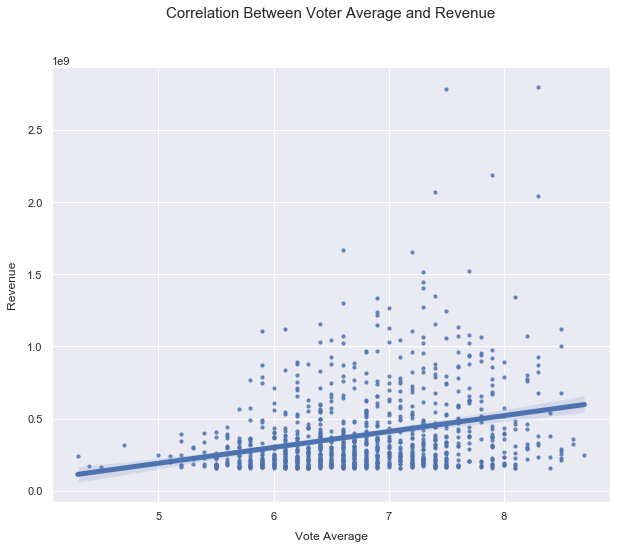

In [97]:
sns.set(font_scale=1.0, color_codes=True)
fig,ax = plt.subplots(figsize = (10,8))
sns.regplot(data=total_pop_df, x="vote_average", y="revenue", ax=ax, marker='o', scatter_kws={"s": 10}, line_kws={"lw":5})

plt.xlabel('Vote Average',labelpad=10)
plt.ylabel('Revenue',labelpad=10)
plt.title('Correlation Between Voter Average and Revenue', y=1.1, fontsize=15)
          
plt.show()

This result is not overly surprising; we see the regression line that is positive and upward sloping; meaning that voter average and revenue have a positive, linear relationship. We can also see that for extreme cases, where revenues are extremely high (over 2.0), these films have a vote averages of 7+. So, we can conclude that for this subset of data, popular films with higher revenues do tend to have higher vote averages. 

To explore this further, we will take a look at the frequency of vote averages across these 1,000 films. Vote averages are analyzed on a 0-10 scale. We can predict that, based on our assumptions and the results of the scatterplot above, that these films with top revenue values will show high frequency values for higher vote averages. Let's create a histogram to investigate whether this is true. 

Text(0, 0.5, 'Frequency')

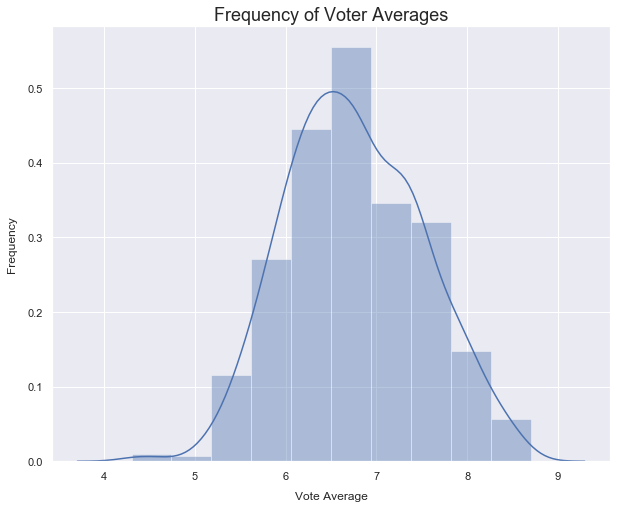

In [99]:
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(total_pop_df.vote_average, bins=10, ax=ax)

sns.set(font_scale=1.5, style="dark")

plt.title('Frequency of Voter Averages')
plt.xlabel('Vote Average',labelpad=10)
plt.ylabel('Frequency',labelpad=10)

The most frequent vote averages for high revenue films are between 6.0 and 7.0. This result is exactly as we would have predicted; high revenue films typically do have high vote averages, and this is evident from the frequency of high vote averages within this subset of data. 

### Question 2

Our second question looks to identify which genres are the most popular. We will do this by using the API call that looked at the top 10,000 films based on popularity. Please note that a new file was created for this question, using data from the original API call based on popularity. Note that all revenue values of 0 have been dropped from this question as well, in order to have consistency in our data across questions.

In [2]:
# Import the new file that contains the top popular films that have revenues greater than 0
df=pd.read_csv('~/Desktop/Flatiron/genres2.csv') 

In [3]:
df.head()

,Unnamed: 0,popularity,genre_ids,revenue
0,0,933.926,"[28, 12, 18, 14]",57000000.0
1,1,743.310,[28],139757.0
2,2,677.443,"[28, 80, 18, 53]",152812.0
3,3,648.896,"[28, 27, 53]",35878266.0
4,4,647.680,"[28, 16]",29900850.0


We will perform several steps to manipulate our data in order to extract a full list of all the available genres and their frequencies.

In [4]:
# Create new list 
newlist=[]
for x in df.loc[:, 'genre_ids']:
    a=x[1:-1].split(', ')
    if not a in newlist:
        newlist.extend(a) 

In [5]:
#Create a set for each unique genre in set
new_set=set(newlist)

In [6]:
#Create the columns with each genre and check genre for each movie
for y in new_set:
    df[y]=df['genre_ids'].map(lambda x : y in x)

In [7]:
df.head()

,Unnamed: 0,popularity,genre_ids,revenue,10751,53,9648,16,10749,27,...,10402,18,878,28,37,99,10770,10752,35,36
0,0,933.926,"[28, 12, 18, 14]",57000000.0,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1,1,743.310,[28],139757.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,677.443,"[28, 80, 18, 53]",152812.0,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,3,648.896,"[28, 27, 53]",35878266.0,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,4,647.680,"[28, 16]",29900850.0,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [8]:
# Look at the sum of each genre in our dataset
df.sum()

Unnamed: 0                                             13007550
popularity                                               120973
genre_ids     [28, 12, 18, 14][28][28, 80, 18, 53][28, 27, 5...
revenue                                             5.47839e+11
10751                                                       648
53                                                         1490
9648                                                        463
16                                                          447
10749                                                       817
27                                                          699
14                                                          632
12                                                         1021
80                                                          787
10402                                                       166
18                                                         2229
878                                     

In [9]:
df.shape

(5101, 23)

In [215]:
#Drop unnecessary columns 
df.drop(columns='Unnamed: 0', inplace=True)

In [10]:
# Create DataFrame that only includes the names of genres
df1=df.drop(columns=['Unnamed: 0','popularity', 'genre_ids', 'revenue'])

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101 entries, 0 to 5100
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   10751   5101 non-null   bool 
 1   53      5101 non-null   bool 
 2   9648    5101 non-null   bool 
 3   16      5101 non-null   bool 
 4   10749   5101 non-null   bool 
 5   27      5101 non-null   bool 
 6   14      5101 non-null   bool 
 7   12      5101 non-null   bool 
 8   80      5101 non-null   bool 
 9   10402   5101 non-null   bool 
 10  18      5101 non-null   bool 
 11  878     5101 non-null   bool 
 12  28      5101 non-null   bool 
 13  37      5101 non-null   bool 
 14  99      5101 non-null   bool 
 15  10770   5101 non-null   bool 
 16  10752   5101 non-null   bool 
 17  35      5101 non-null   bool 
 18  36      5101 non-null   bool 
dtypes: bool(19)
memory usage: 94.8 KB


In [12]:
df1

,10751,53,9648,16,10749,27,14,12,80,10402,18,878,28,37,99,10770,10752,35,36
0,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5096,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
5097,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
5098,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5099,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [13]:
#change the column names to the names of the genres themseles
df1.columns=['Family','Thriller','Mystery','Animation','Romance','Horror','Fantasy','Adventure','Crime','Music','Drama','Science_Fiction','Action','Western','Documentary','TV_Movie','War','Comedy','History']

In [17]:
#make a file csv to covert index by genres
df1.sum().to_csv('final.csv')

In [18]:
#make a file csv to covert index by genres
final_revenue=pd.read_csv('final.csv')

In [19]:
final_revenue.reset_index

<bound method DataFrame.reset_index of          Unnamed: 0     0
0            Family   648
1          Thriller  1490
2           Mystery   463
3         Animation   447
4           Romance   817
5            Horror   699
6           Fantasy   632
7         Adventure  1021
8             Crime   787
9             Music   166
10            Drama  2229
11  Science_Fiction   662
12           Action  1428
13          Western    71
14      Documentary    44
15         TV_Movie     5
16              War   170
17           Comedy  1701
18          History   225>

In [20]:
#rename the columns
final_revenue.columns=['Genres','Frequence'] 

In [21]:
final_revenue

,Genres,Frequence
0,Family,648
1,Thriller,1490
2,Mystery,463
3,Animation,447
4,Romance,817
5,Horror,699
6,Fantasy,632
7,Adventure,1021
8,Crime,787
9,Music,166


Text(0, 0.5, 'Genres')

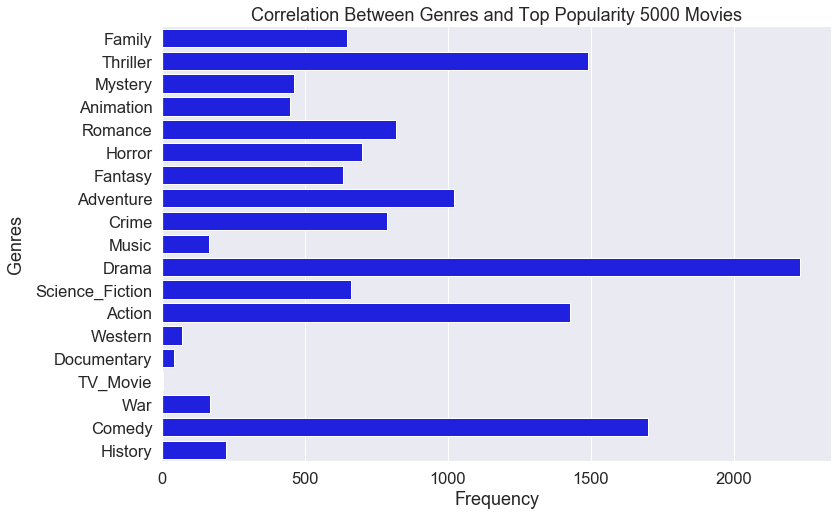

In [27]:
#Create graph
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(data=final_revenue, x="Frequence", y="Genres", color="blue")

sns.set(font_scale=1.5)

plt.title('Correlation Between Genres and Top Popularity 5000 Movies')
plt.xlabel('Frequency')
plt.ylabel('Genres',labelpad=10)